In [1]:
from keras.models import model_from_json

# load json and create model
name_model = 'models/model_0105_2'
json_file = open(name_model + '.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_abc = model_from_json(loaded_model_json)

# load weights into new model
model_abc.load_weights(name_model + '.h5')
print("Loaded model from disk")

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Loaded model from disk


### Predict

In [42]:
from glob import glob
all_imgs_path = glob('../Dataset_CNN/*/*/w_*.jpg')
print(len(all_imgs_path))

230040


In [3]:
import numpy as np
from scipy import signal

def unstep_NLF(NLF_step, step):
    
    N = len(NLF_step)
    NLF_nostep = np.zeros((N*step,1))
    for i in range(N):
        NLF_nostep[i*step:i*step+step] = NLF_step[i];
    
    return NLF_nostep
        
def filter_NLF(N, Wn, x):
    b, a = signal.butter(N, Wn)
    y = signal.filtfilt(b, a, np.ravel(x))
    return y

../Dataset_CNN/Scene_24/Window_1281-3073/NLF_filtered.mat


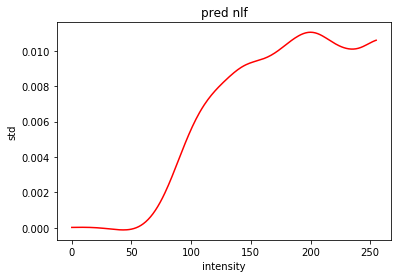

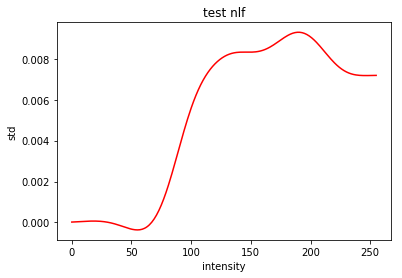

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

ii = 5
N = 3
Wn = 0.03

img_path = all_imgs_path[ii]
NLF_path = img_path[0:-len(img_path.split('/')[-1])] + 'NLF_filtered.mat'
print(NLF_path)

mat = scipy.io.loadmat(NLF_path)
y_ = (mat["NLF_step_filt"][0])
y_[np.isnan(y_)] = 0

y_unstep_filt = filter_NLF(N, Wn, unstep_NLF(y_[0:64],4))

X_ = plt.imread(img_path)
y_pred = np.transpose(model_abc.predict([[X_],[X_],[X_]]))


y_pred_unstep_filt = filter_NLF(N, Wn, unstep_NLF(y_pred/100,4))

fig, ax = plt.subplots()
#y_pred[y_pred < 0] = 0
ax.plot(y_pred_unstep_filt,'r')

ax.set(xlabel='intensity', ylabel='std', title='pred nlf')
plt.show()

fig, ax = plt.subplots()
ax.plot(y_unstep_filt,'r')

ax.set(xlabel='intensity', ylabel='std', title='test nlf')
plt.show()

### Predict from image not in dataset

#### Prediction of a NLF median image in the dataset

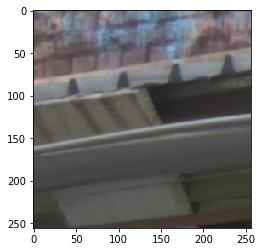

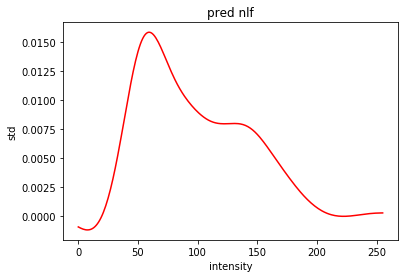

In [70]:
import cv2
img_pred = plt.imread('../Dataset_Final/GT_median_Scene_06.jpg')

i = 2000
j = 100
img_pred = img_pred[i:i+256, j:j+256]
plt.imshow(img_pred)

#img_pred = cv2.resize(img_pred, dsize = (256,256), interpolation=cv2.INTER_CUBIC)
#img_pred = np.float32(img_pred/255)
y_pred = np.transpose(model_abc.predict([[img_pred],[img_pred],[img_pred]]))
y_pred_unstep_filt = filter_NLF(N, Wn, unstep_NLF(y_pred/100,4))

fig, ax = plt.subplots()
ax.plot(y_pred_unstep_filt,'r')

ax.set(xlabel='intensity', ylabel='std', title='pred nlf')
plt.show()



#### Prediction of the same median image but with synthetic noise of var = 0.1

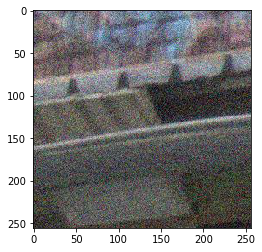

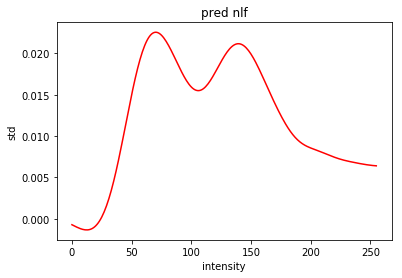

In [74]:
import cv2
img_pred = plt.imread('../Scene_06_synt_noise.jpg')

i = 2000
j = 100
img_pred = img_pred[i:i+256, j:j+256]
plt.imshow(img_pred)
#img_pred = cv2.resize(img_pred, dsize = (256,256), interpolation=cv2.INTER_CUBIC)
#img_pred = np.float32(img_pred/255)
y_pred = np.transpose(model_abc.predict([[img_pred],[img_pred],[img_pred]]))
y_pred_unstep_filt = filter_NLF(N, Wn, unstep_NLF(y_pred/100,4))

fig, ax = plt.subplots()
ax.plot(y_pred_unstep_filt,'r')

ax.set(xlabel='intensity', ylabel='std', title='pred nlf')
plt.show()

#### Convolution of the NLF (median image) with normal distribution (mu =

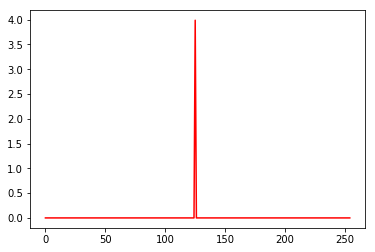

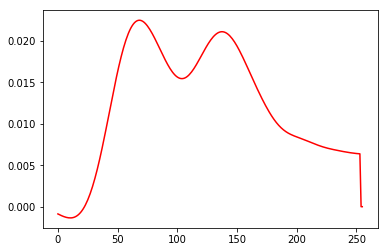

In [84]:
mu = 125
sigma = 0.1
bins = np.asarray([x for x in range(255)])
s =  1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))

fig, ax = plt.subplots()
ax.plot(s,'r')
plt.show()

conv = np.convolve(y_pred_unstep_filt, s/4, 'same')

fig, ax = plt.subplots()
ax.plot(conv,'r')
plt.show()
